In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, f1_score, classification_report
from sklearn.metrics import mean_squared_error
import math
from urllib.parse import urlparse
import pandas as pd
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer # removing the commoner morphological and inflexional endings from words in English
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of grouping together different inflected forms of the same word.
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
#Load up our stop words
stop_words = stopwords.words('english')
#Adds stuff to our stop words list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
import pandas as pd
import numpy as np
import re
import spacy

df_temp = pd.read_csv("/content/drive/MyDrive/Fake news/dataset_enti_sum_processed.csv", index_col=0)
#df, ahol  disinfos sum + nltk sum a real newsokra
df = pd.read_csv("/content/drive/MyDrive/Fake news/dataset_ent_sum.csv", index_col=0)

In [78]:
df

,title,author,url,date,year,month,day,regions,tags,summary,og_link,original_lang,label,summary_nltk,entities
0,There is a Western pressure campaign against R...,na,https://euvsdisinfo.eu/report/western-pressure...,2020-02-06,2020.0,2.0,6.0,"France, US, Russia","Russia Today (RT), Emmanuel Macron, Mainstream...",Western countries are carrying out a pressure ...,https://mundo.sputniknews.com/politica/2020020...,Spanish,1,Western countries are carrying out a pressure ...,"Emmanuel Macron, French, RT, Russian, Sputnik, US"
1,World's most expensive cities: New York and Si...,Malu Cursino,https://bbc.com/news/world-63825214,2022-12-01 00:00:00,2022.0,12.0,1.0,NaN,War in Ukraine,The world's most expensive cities are jointly ...,https://bbc.com/news/world-63825214,en,0,1 = New York 1 = Singapore 3 = Tel Aviv 4 = Ho...,"10 - earlier this year, 4, Algiers, Almaty, Ch..."
2,Ukraine: Bath woman says visa scheme an 'absol...,NaN,https://bbc.com/news/uk-england-somerset-61113570,2022-04-15 00:00:00,2022.0,4.0,15.0,NaN,War in Ukraine,A woman who has prepared her home for the arri...,https://bbc.com/news/uk-england-somerset-61113570,en,0,Five adults and two children have arrived in B...,"BANES, Bath and North East Somerset, Dine Rome..."
3,Swedes cheer end of long wait to join Nato,Maddy Savage,https://bbc.com/news/world-europe-68509301,2024-03-08 00:00:00,2024.0,3.0,8.0,NaN,War in Ukraine,"Almost two years after applying to join Nato, ...",https://bbc.com/news/world-europe-68509301,en,0,"In early 2022, the country's then Social Democ...","16, Almost two years, BBC, Friday, Joe Biden, ..."
4,Misinformation spreads in China on ‘civil war’...,Kerry Allen,https://bbc.com/news/world-us-canada-68185317,2024-02-02 00:00:00,2024.0,2.0,2.0,NaN,War in Ukraine,Amid the escalating border standoff between Te...,https://bbc.com/news/world-us-canada-68185317,en,0,"A Voice of America journalist Wenhao, who spec...","Abbott, China, Chinese, Florida, Friday, Lone ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12873,What’s next for Julian Assange,Alexander Zaitchik,https://therealnews.com/whats-next-for-julian-...,2024-02-23 00:00:00,2024.0,2.0,23.0,NaN,War in Ukraine,This story originally appeared in Truthdig on ...,https://therealnews.com/whats-next-for-julian-...,English,0,If the judges decide to buck Britain’s politic...,"2012, 2022, Assange, Belmarsh, Britain, Britis..."
12874,Leaders of NATO's European countries are compl...,na,https://euvsdisinfo.eu/report/leaders-of-natos...,2021-10-22,2021.0,10.0,22.0,"EU, Europe, Russia, US","NATO, Warmongering, security threat, US presen...",The leaders of NATO's 28 European countries ar...,https://sputnik.az/20211022/nato-nun-problemi-...,Azerbaijani,1,The leaders of NATO's 28 European countries ar...,"Brussels, European, NATO, Russian, Washington,..."
12875,Secret classes to counter Russian brainwashing...,Anastasiia Levchenko,https://bbc.com/news/world-68578822,2024-03-16 00:00:00,2024.0,3.0,16.0,NaN,War in Ukraine,"Like millions of other Ukrainians, in the earl...",https://bbc.com/news/world-68578822,en,0,"""It's not so important to teach children what ...","Nataliia, Russian, Ukraine, Ukrainian, Valera"
12876,"Neo-Nazis commit genocide in Ukraine, Russia f...",na,https://euvsdisinfo.eu/report/neo-nazis-commit...,2022-02-25,2022.0,2.0,25.0,"Ukraine, Russia","War in Ukraine, Donbas, Genocide, Nazi/Fascist",Nobody intends to attack the Ukrainian people....,https://tass.com/politics/1411139,English,1,Nobody intends to attack the Ukrainian people....,"Nazis, Russia, Ukrainian"


In [79]:
df['summary'][1]

'The world\'s most expensive cities are jointly New York and Singapore, according to the annual Economist Intelligence Unit (EIU) survey. It is the first time New York has topped the rankings. Last year\'s number one, Tel Aviv, is now placed third. Overall, the average cost of living in the world\'s biggest cities is up 8.1% this year, the EIU survey reports. The war in Ukraine and Covid\'s impact on supply chains were identified as factors behind the increase. Inflation was particularly high in Istanbul - with prices up by 86% - Buenos Aires (64%) and Tehran (57%). High inflation in the US was one of the reasons for New York topping the list. Los Angeles and San Francisco also made the top 10 - earlier this year, US inflation was the highest in more than 40 years. The strengthening dollar was also a factor in the US cities\' prominence. Moscow and St Petersburg rose through the rankings by 88 and 70 places, to 37th and 73rd place respectively, partly as a result of Western sanctions f

In [80]:
df['summary_nltk'][1]

'1 = New York 1 = Singapore 3 = Tel Aviv 4 = Hong Kong 4 = Los Angeles 6 = Zurich 7 = Geneva 8 = San Francisco 9 = Paris 10 = Sydney 10 = Copenhagen 161 = Colombo 161 = Bangalore 161 = Algiers 164 = Chennai 165 = Ahmedabad 166 = Almaty 167 = Karachi 168 = Tashkent 169 = Tunis 170 = Tehran 171 = Tripoli 172 = Damascus Source: EIU\'s World Cost of Living index The world\'s most expensive cities are jointly New York and Singapore, according to the annual Economist Intelligence Unit (EIU) survey. She said the average price rise across the 172 cities in the EIU\'s survey has been "the strongest we\'ve seen in the 20 years for which we have digital data". Overall, the average cost of living in the world\'s biggest cities is up 8.1% this year, the EIU survey reports. Los Angeles and San Francisco also made the top 10 - earlier this year, US inflation was the highest in more than 40 years. The EIU compared more than 400 individual prices across over 200 products and services from 172 cities ar

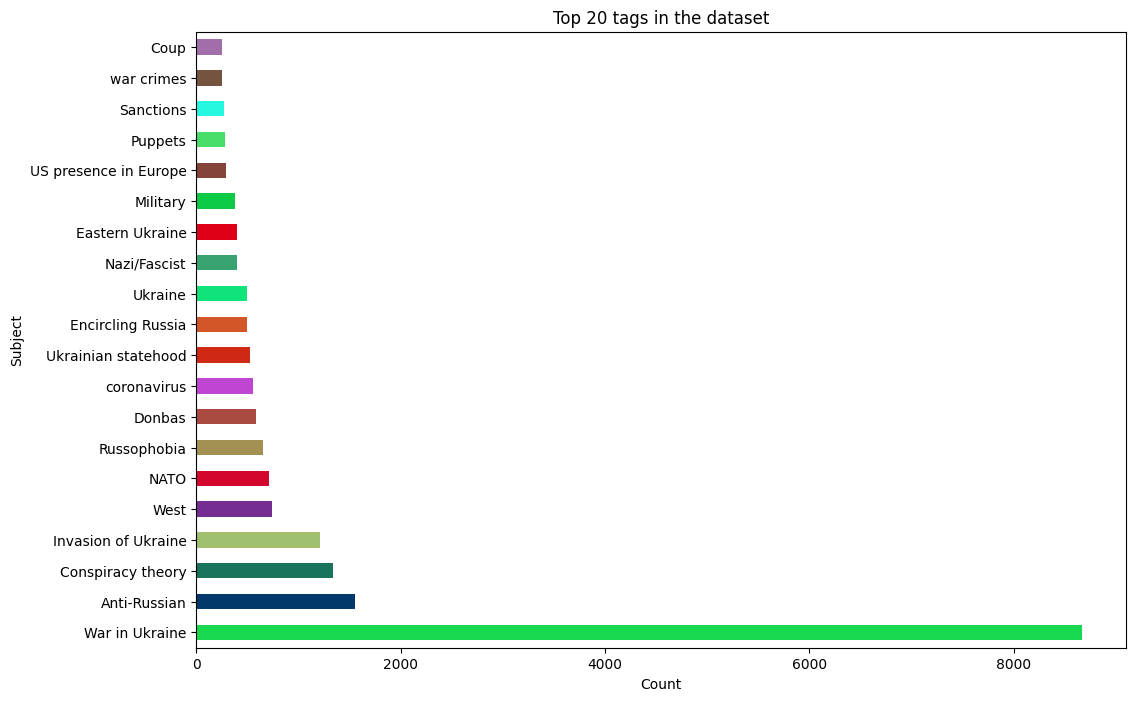

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import random
#nltk.download('stopwords')


df['tags_list'] = df['tags'].str.split(',')

# Create a flat list of all subjects
tags = [subject.strip() for subjects_list in df['tags_list'] for subject in subjects_list]

# Count the occurrences of each subject
subject_counts = pd.Series(tags).value_counts()
colors =['#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(subject_counts))]
# Plot the top N subjects (adjust N as needed)
top_n_subjects = 20
subject_counts.head(top_n_subjects).plot(kind='barh', figsize=(12, 8), color=colors)
plt.title('Top {} tags in the dataset'.format(top_n_subjects))
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

In [82]:
#Átlagos szöveghosszúság meghatározása
df['summary_length'] = df['summary_nltk'].apply(lambda x: len(str(x)))

average_length = df['summary_length'].mean()

print(f"The average length of the summaries is: {average_length} characters.")

The average length of the summaries is: 764.7679471032745 characters.


In [83]:
df = df.dropna(subset = ['summary_nltk'])
df = df.dropna(subset = ['date'])


In [84]:
df['author'] = df['author'].fillna('unknown')

In [85]:
df['content'] = df['summary_nltk']

In [86]:
df.isna().sum()

title                0
author               0
url                  0
date                 0
year                 0
month                0
day                  0
regions           6401
tags                 0
summary              0
og_link             68
original_lang        0
label                0
summary_nltk         0
entities           129
tags_list            0
summary_length       0
content              0
dtype: int64

In [87]:
df['content'] = df['content'].str.replace(r"[\"'!@#$%^&*(){}[\]:;,<.>?/~`_+=|-]", '', regex=True)

In [88]:
def preprocess_text(text):
    #print("\n Preprocessing: \n")
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # print("Special chars", text)
    # Tokenization
    words = word_tokenize(text)
    # print("Tokens", words)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    #print("Stopwordsd removed", words)
    #Stemming
    stemmer = PorterStemmer()
    #words = [stemmer.stem(word) for word in words]
    #print("Stemmed" ,words)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    #print("Lemmatized", words)

    return " ".join(words)

## ML, DL

In [89]:
from nltk import pos_tag

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#keras
import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [90]:
#df['content_tokens'] = df['content'].apply(preprocess_text)
#df['content'] = df['content'].apply(preprocess_text)

In [91]:
# function to clean and pre-process the text.
from bs4 import BeautifulSoup
def clean_reviews(review):

    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()

    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)

    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()

    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]

    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [92]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') # world_tokenize() ?
sentences=[]
sum=0
for review in df['content']:
    sents=tokenizer.tokenize(review.strip())
    sum+=len(sents)
    for sent in sents:
        cleaned_sent=clean_reviews(sent)
        sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))  # total no of sentences

12570
12570


In [93]:
# trying to print few sentences
for te in sentences[:5]:
    print(te,"\n")

['western', 'country', 'carrying', 'pressure', 'campaign', 'russian', 'medium', 'u', 'congressman', 'french', 'president', 'emmanuel', 'macron', 'accused', 'rt', 'sputnik', 'without', 'evidence', 'interfering', 'election', 'country'] 

['new', 'york', 'singapore', 'tel', 'aviv', 'hong', 'kong', 'los', 'angeles', 'zurich', 'geneva', 'san', 'francisco', 'paris', 'sydney', 'copenhagen', 'colombo', 'bangalore', 'algiers', 'chennai', 'ahmedabad', 'almaty', 'karachi', 'tashkent', 'tunis', 'tehran', 'tripoli', 'damascus', 'source', 'eius', 'world', 'cost', 'living', 'index', 'world', 'expensive', 'city', 'jointly', 'new', 'york', 'singapore', 'according', 'annual', 'economist', 'intelligence', 'unit', 'eiu', 'survey', 'said', 'average', 'price', 'rise', 'across', 'city', 'eius', 'survey', 'strongest', 'weve', 'seen', 'year', 'digital', 'data', 'overall', 'average', 'cost', 'living', 'world', 'biggest', 'city', 'year', 'eiu', 'survey', 'report', 'los', 'angeles', 'san', 'francisco', 'also', 'm

In [94]:
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300,window=10,min_count=1)

In [95]:
# Now you can build the vocabulary with your sentences and set update=True to update the model with new words
w2v_model.train(sentences, total_examples=len(sentences), epochs=10)

(8707663, 9100080)

In [96]:
# total numberof extracted words.
vocab = list(w2v_model.wv.key_to_index.keys())
print("The total number of words are : ",len(vocab))

The total number of words are :  29540


In [97]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size


The no of key-value pairs :  29540


In [98]:
df['clean_content'] = df['content'].apply(clean_reviews)

In [99]:
maxi=-1
for i,rev in enumerate(df['clean_content']):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(f'Max lenght of a summary: {maxi}')

Max lenght of a summary: 639


In [100]:

tok = Tokenizer()
tok.fit_on_texts(df['clean_content'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(df['clean_content'])

In [101]:
max_rev_len=maxi  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [102]:

pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape

(12588, 639)

In [103]:
# now creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [104]:
print(embed_matrix[14])

[ 1.18385792e+00  2.27372026e+00 -2.03094244e+00 -2.21895766e+00
  3.77536207e-01 -3.38417947e-01 -1.77413738e+00 -2.53718185e+00
 -5.38600385e-01 -1.69684660e+00  7.89666951e-01 -3.38784695e+00
 -5.26015639e-01 -4.38153863e-01 -1.65468216e+00  3.65224719e-01
  8.67292762e-01  4.64507788e-01  1.36935532e+00  1.28822255e+00
  9.88888800e-01 -3.88466358e-01  8.98456573e-01 -2.16011953e+00
 -2.15609848e-01  2.68734074e+00 -3.09622622e+00 -1.84193659e+00
  1.55818725e+00 -1.50879371e+00 -1.79928839e-01 -1.89246207e-01
  1.30767858e+00  1.32998466e+00 -1.51084065e+00 -7.10415006e-01
  1.05107278e-01  1.08318877e+00 -9.21843112e-01  3.82481515e-01
  1.43717575e+00 -1.95103276e+00 -1.21212876e+00  1.12413931e+00
 -1.48041558e+00  1.18185639e+00  1.76196742e+00 -9.33341324e-01
 -5.07510841e-01 -7.30221570e-01 -2.71631032e-01  2.16888142e+00
  2.14182854e+00  2.62297368e+00  1.97409272e+00 -8.47661316e-01
 -1.10323608e-01 -2.91548343e-03 -4.91145492e-01 -3.86758149e-01
  7.98502326e-01 -1.20339

In [105]:
# prepare train and val sets first
Y=(df['label'])
x_train,x_test,y_train,y_test=train_test_split(pad_rev,Y,test_size=0.20,random_state=42)

In [106]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import ReLU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1,mode='auto')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim,
                    input_length=max_rev_len, weights=[embed_matrix],
                    trainable=True))
model.add(Bidirectional(LSTM(64, dropout = 0.2)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer= 'SGD', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 639, 300)          8862300   
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               186880    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9057501 (34.55 MB)
Trainable params: 9057501 (34.55 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [108]:
#relu, relu, sigmoid SGD
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test), callbacks = [early_stopping, model_checkpoint])

Epoch 1/30
315/315 [==============================] - ETA: 0s - loss: 0.6207 - accuracy: 0.7171
Epoch 1: val_loss improved from inf to 0.48390, saving model to best_model.h5
315/315 [==============================] - 28s 80ms/step - loss: 0.6207 - accuracy: 0.7171 - val_loss: 0.4839 - val_accuracy: 0.8384
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


315/315 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.8567
Epoch 2: val_loss improved from 0.48390 to 0.30033, saving model to best_model.h5
315/315 [==============================] - 20s 63ms/step - loss: 0.3993 - accuracy: 0.8567 - val_loss: 0.3003 - val_accuracy: 0.8701
Epoch 3/30
315/315 [==============================] - ETA: 0s - loss: 0.2823 - accuracy: 0.8858
Epoch 3: val_loss improved from 0.30033 to 0.23209, saving model to best_model.h5
315/315 [==============================] - 17s 54ms/step - loss: 0.2823 - accuracy: 0.8858 - val_loss: 0.2321 - val_accuracy: 0.9079
Epoch 4/30
315/315 [==============================] - ETA: 0s - loss: 0.2171 - accuracy: 0.9180
Epoch 4: val_loss improved from 0.23209 to 0.16286, saving model to best_model.h5
315/315 [==============================] - 16s 52ms/step - loss: 0.2171 - accuracy: 0.9180 - val_loss: 0.1629 - val_accuracy: 0.9384
Epoch 5/30
314/315 [============================>.] - ETA: 0s - loss: 0.1480 -

In [109]:
#history_rrs_a = model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test), callbacks = [early_stopping, model_checkpoint])

In [110]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)


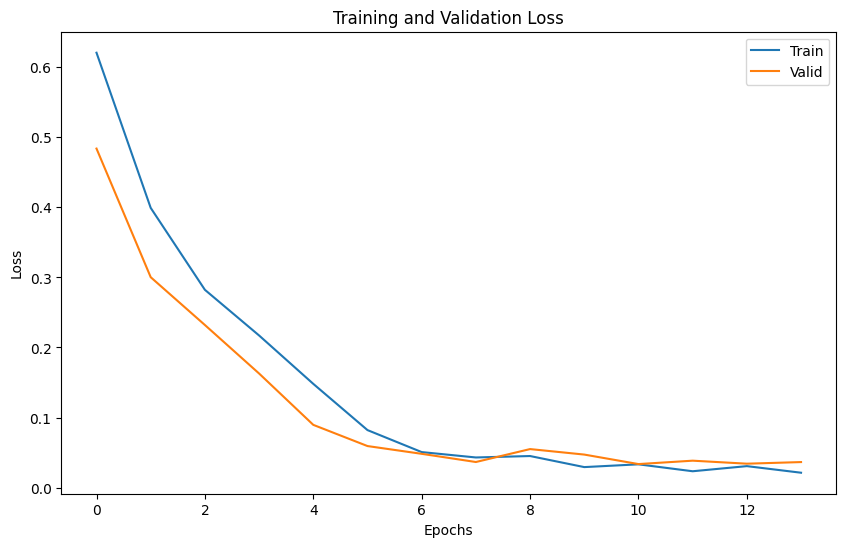

In [111]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_loss)), train_loss, label='Train')
plt.plot(range(len(val_loss)), val_loss, label='Valid')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


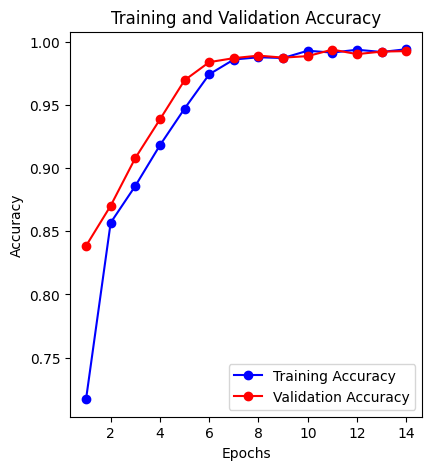

In [112]:
# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [113]:
import nltk
from nltk.tokenize import word_tokenize

B = "Tensions soared as Biden threatened to withhold toy shipments to Israel's sandcastles if they dared storm Rafah. Israeli bigwigs flailed, Erdan wailed about emboldened foes, while Netanyahu flexed with a we'll stand alone video montage. Bidens jab rocked Israels war boat, prompting cries of Not fair! from Likuds Zohar and a Hamas loves Biden diss from Ben Gvir, causing Herzog to roll his eyes. Lapid finger-pointed at Netanyahu, warning of IDF soldier jeopardy, while Michaeli accused the government of turning Israel into a strategic sitting duck."
A = "Israeli officials are reeling after US President Joe Biden's declaration that the US would cease some arms shipments if Israel launched a full-scale operation in Rafah. The statement, made in an interview with CNN, ignited criticism from Israeli Ambassador Gilad Erdan, who deemed it potentially emboldening to Israel's enemies. Prime Minister Benjamin Netanyahu responded by affirming Israel's resolve. Biden's stance underscores a shift in US-Israel relations amidst mounting pressure to protect Gazan civilians. Despite pleas to reconsider military plans, Israel has undertaken limited operations. Biden's move has stoked anger among Israeli politicians, exposing deep rifts. Likud Minister Miki Zohar decried forgetting past terror attacks, while Minister of National Security Itamar Ben Gvir's critique prompted President Isaac Herzog's rebuke. "

sentences = tokenizer.tokenize(B.strip())

# Clean sentences and tokenize words
cleaned_sentences = [clean_reviews(sent).split() for sent in sentences]

sequences = tok.texts_to_sequences(cleaned_sentences)

import itertools
flattened_sequence = list(itertools.chain(*sequences))

# Assuming 'max_rev_len' is the length your model expects
padded_sequences = pad_sequences([flattened_sequence], maxlen=max_rev_len, padding='post')


# Make prediction
predictions = model.predict(padded_sequences)
predicted_class = (predictions > 0.5).astype(int)  # Assuming a binary classification model
print("Predicted class:", predicted_class[0])


1/1 [==============================] - 1s 702ms/step
Predicted class: [1]


In [114]:
import nltk
from nltk.tokenize import word_tokenize

B = "Tensions soared as Biden threatened to withhold toy shipments to Israel's sandcastles if they dared storm Rafah. Israeli bigwigs flailed, Erdan wailed about emboldened foes, while Netanyahu flexed with a we'll stand alone video montage. Bidens jab rocked Israels war boat, prompting cries of Not fair! from Likuds Zohar and a Hamas loves Biden diss from Ben Gvir, causing Herzog to roll his eyes. Lapid finger-pointed at Netanyahu, warning of IDF soldier jeopardy, while Michaeli accused the government of turning Israel into a strategic sitting duck."
A = "Israeli officials are reeling after US President Joe Biden's declaration that the US would cease some arms shipments if Israel launched a full-scale operation in Rafah. The statement, made in an interview with CNN, ignited criticism from Israeli Ambassador Gilad Erdan, who deemed it potentially emboldening to Israel's enemies. Prime Minister Benjamin Netanyahu responded by affirming Israel's resolve. Biden's stance underscores a shift in US-Israel relations amidst mounting pressure to protect Gazan civilians. Despite pleas to reconsider military plans, Israel has undertaken limited operations. Biden's move has stoked anger among Israeli politicians, exposing deep rifts. Likud Minister Miki Zohar decried forgetting past terror attacks, while Minister of National Security Itamar Ben Gvir's critique prompted President Isaac Herzog's rebuke. "

sentences = tokenizer.tokenize(A.strip())

# Clean sentences and tokenize words
cleaned_sentences = [clean_reviews(sent).split() for sent in sentences]

sequences = tok.texts_to_sequences(cleaned_sentences)

flattened_sequence = list(itertools.chain(*sequences))

padded_sequences = pad_sequences([flattened_sequence], maxlen=max_rev_len, padding='post')
predictions = model.predict(padded_sequences)
predicted_class = (predictions > 0.5).astype(int)  # Assuming a binary classification model
print("Predicted class:", predicted_class[0])

1/1 [==============================] - 0s 33ms/step
Predicted class: [0]


In [115]:
import pickle
import joblib

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    joblib.dump(tok, f)


In [116]:
import json

config = {'max_rev_len': max_rev_len}
with open('config.json', 'w') as f:
    json.dump(config, f)


In [117]:
import os


# Define the base directory within your Google Drive
base_dir = '/content/drive/My Drive/LSTMModelFiles'

# Create the directory if it does not exist
os.makedirs(base_dir, exist_ok=True)

tokenizer_path = os.path.join(base_dir, 'tokenizer.pkl')
with open(tokenizer_path, 'wb') as f:
    joblib.dump(tok, f)

model_path = os.path.join(base_dir, 'model.h5')
model.save(model_path)

config_path = os.path.join(base_dir, 'config.json')
with open(config_path, 'w') as f:
    json.dump({'max_rev_len': max_rev_len}, f)


#to load: with open(tokenizer_path, 'rb') as f:
    #tokenizer = pickle.load(f)
